## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [10]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib

importlib.reload(main)

<module 'main' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/main.py'>

## Variables

In [14]:
part = "Paragolpe Delantero"
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [12]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 1m 15s
The preloaded images use 0.07039642333984375MB of memory


----- CLASS DISTRIBUTION -----
Class: no_paragolpe_delantero, #916, 55.02%
Class: paragolpe_delantero_roto, #407, 24.44%
Class: paragolpe_delantero_sano, #342, 20.54%
#TRAIN 1332 #TEST 333
Epoch 0/39
----------
train Loss: 0.9803 Main metric (macro_f1): 0.2652 Time: 9.20s
test Loss: 0.8544 Main metric (macro_f1): 0.2998 Time: 0.94s
Epoch 1/39
----------
train Loss: 0.8298 Main metric (macro_f1): 0.3773 Time: 9.18s
test Loss: 0.7182 Main metric (macro_f1): 0.4936 Time: 0.94s
ES Module Best: 0.7182032093629465, BadEpochs: 0
Epoch 2/39
----------
train Loss: 0.6946 Main metric (macro_f1): 0.5675 Time: 9.23s
test Loss: 0.6018 Main metric (macro_f1): 0.6842 Time: 0.96s
ES Module Best: 0.6018093980110444, BadEpochs: 0
Epoch 3/39
----------
train Loss: 0.5930 Main metric (macro_f1): 0.6456 Time: 9.27s
test Loss: 0.5230 Main metric (macro_f1): 0.5490 Time: 0.96s
ES Module Best: 0.5230107554444322, BadEpochs: 0
Epoch 4/39
----------
train Loss: 0.5153 Main metric (macro_f1): 0.6945 Time: 9.25s


,class,precision,recall,f1
0,paragolpe_delantero_roto,0.661972,0.643836,0.652778
1,paragolpe_delantero_sano,0.626866,0.656250,0.641221
2,no_paragolpe_delantero,0.979487,0.974490,0.976982


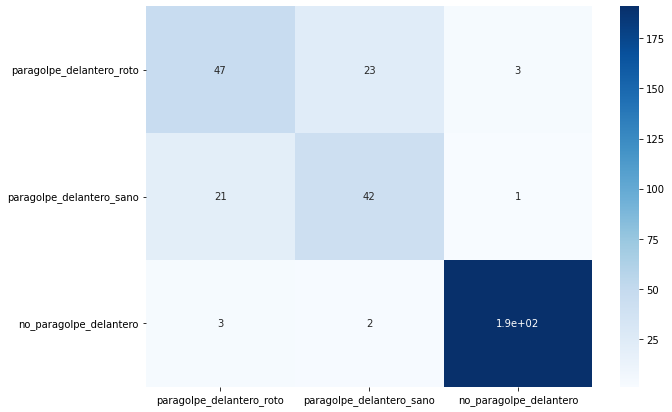

In [15]:
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "resnet50_paragolpe_fine_tuning-new-final"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    ignore_repair=True
)

In [ ]:
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "resnet50_paragolpe_fine_tuning-new-final"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    ignore_repair=True
)